In [8]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

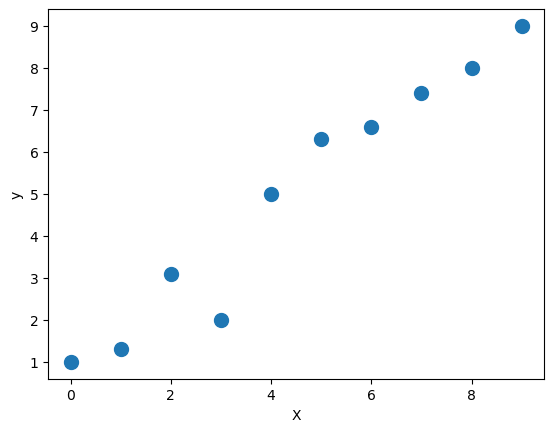

In [3]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [9]:
X_train_std = torch.from_numpy((X_train - np.mean(X_train)) / np.std(X_train))
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_std, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [13]:
# Define the simple linear model y = w X + b
torch.manual_seed(42)

weight = torch.randn(1)
weight.requires_grad_()

bias = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb @ weight + bias

In [14]:
# Define the MSE loss
def loss_func(input, target):
    return (input - target).pow(2).mean()

In [17]:
# Learning parameters
learning_rate = 1e-3
num_epochs = 200
log_epochs = 10

# Training loop
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:

        pred = model(x_batch) # predict
        loss = loss_func(pred, y_batch.long()) # compute loss
        loss.backward() # automatic differentiation of the loss w.r.t parameters with requires_grad

    with torch.no_grad(): # pause updates to the model to do it manually

        # Manual update to params
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate

        # Delete gradient after updates
        weight.grad.zero_()
        bias.grad.zero_()

    if not epoch % log_epochs:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

print("Training Complete")
print(f"Final parameters: w = {weight.item()}, b = {bias.item()}")

Epoch 0: Loss = 0.0039
Epoch 10: Loss = 0.2566
Epoch 20: Loss = 0.0175
Epoch 30: Loss = 0.0050
Epoch 40: Loss = 0.0239
Epoch 50: Loss = 0.0027
Epoch 60: Loss = 0.1646
Epoch 70: Loss = 0.0012
Epoch 80: Loss = 0.2775
Epoch 90: Loss = 0.4606
Epoch 100: Loss = 0.0025
Epoch 110: Loss = 0.0357
Epoch 120: Loss = 0.2814
Epoch 130: Loss = 1.9478
Epoch 140: Loss = 0.0160
Epoch 150: Loss = 0.2868
Epoch 160: Loss = 0.1606
Epoch 170: Loss = 0.0039
Epoch 180: Loss = 0.5412
Epoch 190: Loss = 0.1603
Training Complete
Final parameters: w = 2.6800997257232666, b = 4.798574924468994


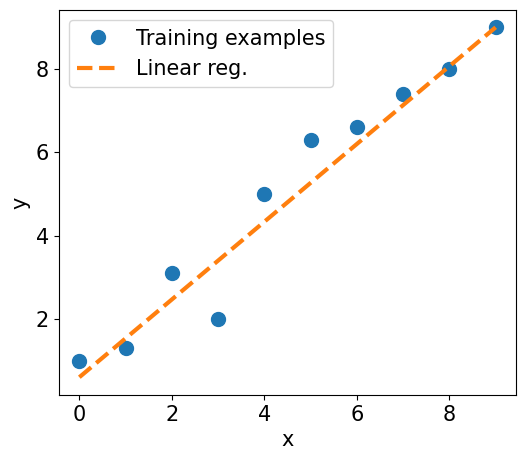

In [18]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_std = torch.from_numpy((X_test - np.mean(X_train)) / np.std(X_train))

y_pred = model(X_test_std).detach().numpy()

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train, y_train, 'o', markersize=10)
plt.plot(X_test, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

Now we can rredo the same thing using torch inbuilts - the model and loss are common functions, and can be obtained within torch.nn.

In [19]:
import torch.nn as nn

In [20]:
loss_func = nn.MSELoss(reduction='mean')

input_size, output_size = 1, 1
model = nn.Linear(input_size, output_size)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [21]:
# Training loop
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:

        pred = model(x_batch)[:, 0] # predict
        loss = loss_func(pred, y_batch) # compute loss
        loss.backward() # automatic differentiation of the loss w.r.t parameters with requires_grad

        # Replace the entire update sequence with the optimzier steps
        optimizer.step()
        optimizer.zero_grad()

    if not epoch % log_epochs:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

print("Training Complete")
print(f"Final parameters: w = {model.weight.item()}, b = {model.bias.item()}")

Epoch 0: Loss = 19.0923
Epoch 10: Loss = 0.7955
Epoch 20: Loss = 0.2781
Epoch 30: Loss = 13.2044
Epoch 40: Loss = 0.0466
Epoch 50: Loss = 6.7635
Epoch 60: Loss = 1.2701
Epoch 70: Loss = 2.7914
Epoch 80: Loss = 0.8390
Epoch 90: Loss = 1.3031
Epoch 100: Loss = 0.1053
Epoch 110: Loss = 0.2958
Epoch 120: Loss = 0.5240
Epoch 130: Loss = 0.0786
Epoch 140: Loss = 0.3803
Epoch 150: Loss = 0.1566
Epoch 160: Loss = 1.1082
Epoch 170: Loss = 0.0006
Epoch 180: Loss = 0.9785
Epoch 190: Loss = 0.0112
Training Complete
Final parameters: w = 2.660538911819458, b = 4.890290260314941
